Isabella Chittumuri

724 Homework 1

Question 5:

$y_i = x_i\beta$

$y_i = x_i \frac{\sum^n_{j=1} x_jy_j}{\sum^n_{k=1} x_k^2}$

$ = \sum^n_{j=1} \frac{x_ix_j}{\sum^n_{k=1} x_k^2}y_i$

$ = \sum^n_{j=1} a_jy_j$

thus,
$a_j = \frac{x_ix_j}{\sum^n_{k=1} x_k^2}$


Question 10

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf # more convenient

# %matplotlib?
%matplotlib inline
%matplotlib
plt.style.use('seaborn-white')

Using matplotlib backend: MacOSX


In [2]:
import os
carseats = pd.read_csv('Carseats.csv')

(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US

In [3]:
est = smf.ols('Sales ~ Price + Urban + US', carseats).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           2.39e-23
Time:                        19:07:15   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

The coefficient of the “Price” variable is saying that the average effect of a price increase of 1 dollar is a decrease of 54.4588492 units in sales. The coefficient of the “Urban” variable is saying that on average the unit sales in urban location are 21.9161508 units less than in rural location. The coefficient of the “US” variable is saying that on average the unit sales in a US store are 1200.5726978 units more than in a non US store.

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

Sales= 13.0434689 + (−0.0544588) × Price + (−0.0219162) × Urban + (1.2005727) × US + ε

with Urban=1 if the store is in an urban location and 0 if not, and US=1 if the store is in the US and 0 if not.

(d) For which of the predictors can you reject the null hypothesis H0 :βj =0?

Reject the null hypothesis for the “Price” and “US” variables.

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome

In [14]:
est1 = smf.ols('Sales ~ Price + US', carseats).fit()
est1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           2.66e-24
Time:                        20:14:05   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) How well do the models in (a) and (e) fit the data?

The R2 for the smaller model is marginally better than for the bigger model. 23.9% of the variablility is explained by the model (R^2 = 0.239)

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s)

     [O.025] [0.975]
      
US:        0.692     1.708

Price:  -0.65  -0.044


(h) Is there evidence of outliers or high leverage observations in the model from (e)?


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

fitted_values = pd.Series(est1.fittedvalues, name="Fitted Values")
residuals = pd.Series(est1.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False, ax=axes[0])
#ax1.set_title('Residual Plot for Linear Fit')

s_residuals = pd.Series(est1.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals, fit_reg=False, ax=axes[1])

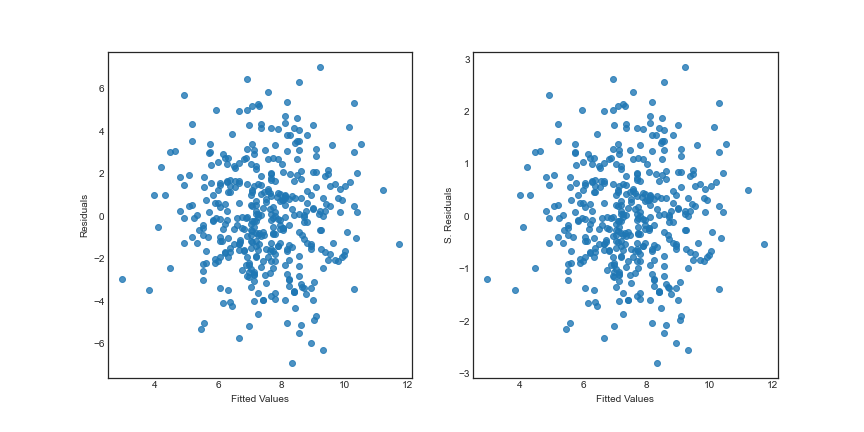

In [9]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(est1).influence, name = "Leverage")
sns.regplot(leverage, s_residuals, fit_reg = False)

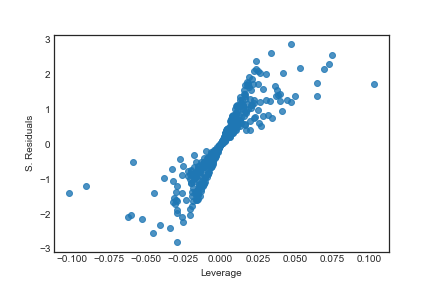

These two plots indicate the presence of a few outliers.